In [1]:
import numpy as np
import pandas as pd

# visualization
import altair as alt
from vega_datasets import data

# # set decimals
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# enable altair visualizations
alt.renderers.enable()
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
counties = pd.read_csv('Georgia_Counties_Population.csv')
counties['County'] = counties.Name.str.split(' County').str[0]

In [3]:
ga_covid = pd.read_csv('Georgia_Counties_Covid_Mar23.csv', encoding = "ISO-8859-1")

In [4]:
fips = pd.read_csv('FIPS_County_Codes.csv')
fips['CountyState'] = fips.Name + fips.State

In [5]:
counties.head()

,Name,2020 Population,Growth Since 2010,County
0,Appling County,"18,507",0.95%,Appling
1,Atkinson County,"8,297",-0.82%,Atkinson
2,Bacon County,"11,185",1.18%,Bacon
3,Baker County,"3,092",-9.99%,Baker
4,Baldwin County,"44,823",-1.92%,Baldwin


In [6]:
ga_covid.head()

,County,Cases
0,Baldwin,2
1,Barrow,1
2,Bartow,56
3,Bibb,1
4,Butts,2


In [244]:
ga_covid

,County,Cases
0,Baldwin,2
1,Barrow,1
2,Bartow,56
3,Bibb,1
4,Butts,2
...,...,...
58,Turner,1
59,Twiggs,1
60,Unknown,27
61,Whitfield,2


In [12]:
df = pd.merge(counties, ga_covid, on='County', how='outer')
df['CountyState'] = df.County + ' GA'
df =  pd.merge(df, fips, on='CountyState')
df['id'] = df.FIPS.astype('str')
df.Cases = df.Cases.fillna(0).astype('int')
df['Population'] = df['2020 Population'].str.replace(',', '').fillna(0).astype('int')
df['CasesPer100K'] = np.round(df.Cases / (df['Population'] / 100000),2)
df =  df.replace([np.inf, -np.inf], np.nan)
df.CasesPer100K =  df.CasesPer100K.fillna(0)
# df.CasesPer100K = np.round(df.CasesPer100K, 1)

In [13]:
df.sort_values(by=['CasesPer100K'], inplace=True, ascending=False)
df.head(50)

,Name_x,2020 Population,Growth Since 2010,County,Cases,CountyState,FIPS,Name_y,State,id,Population,CasesPer100K
46,Dougherty County,"91,243",-3.46%,Dougherty,52,Dougherty GA,13095,Dougherty,GA,13095,91243,56.99
87,Lee County,"29,764",4.74%,Lee,16,Lee GA,13177,Lee,GA,13177,29764,53.76
7,Bartow County,"106,408",6.32%,Bartow,56,Bartow GA,13015,Bartow,GA,13015,106408,52.63
134,Terrell County,"8,611",-9.60%,Terrell,2,Terrell GA,13273,Terrell,GA,13273,8611,23.23
48,Early County,"10,247",-6.71%,Early,2,Early GA,13099,Early,GA,13099,10247,19.52
99,Miller County,"5,686",-7.26%,Miller,1,Miller GA,13201,Miller,GA,13201,5686,17.59
84,Lamar County,"19,000",4.03%,Lamar,3,Lamar GA,13171,Lamar,GA,13171,19000,15.79
31,Clinch County,"6,648",-1.80%,Clinch,1,Clinch GA,13065,Clinch,GA,13065,6648,15.04
119,Randolph County,"6,833",-10.87%,Randolph,1,Randolph GA,13243,Randolph,GA,13243,6833,14.63
21,Carroll County,"118,121",6.74%,Carroll,16,Carroll GA,13045,Carroll,GA,13045,118121,13.55


In [215]:
df[df.County == 'DeKalb']

,Name_x,2020 Population,Growth Since 2010,County,Cases,CountyState,FIPS,Name_y,State,id,Population,CasesPer100K
43,DeKalb County,"756,558",9.25%,DeKalb,53,DeKalb GA,13089,DeKalb,GA,13089,756558,7.01


In [217]:
df.head()

,Name_x,2020 Population,Growth Since 2010,County,Cases,CountyState,FIPS,Name_y,State,id,Population,CasesPer100K
46,Dougherty County,"91,243",-3.46%,Dougherty,52,Dougherty GA,13095,Dougherty,GA,13095,91243,56.99
87,Lee County,"29,764",4.74%,Lee,16,Lee GA,13177,Lee,GA,13177,29764,53.76
7,Bartow County,"106,408",6.32%,Bartow,56,Bartow GA,13015,Bartow,GA,13015,106408,52.63
134,Terrell County,"8,611",-9.60%,Terrell,2,Terrell GA,13273,Terrell,GA,13273,8611,23.23
48,Early County,"10,247",-6.71%,Early,2,Early GA,13099,Early,GA,13099,10247,19.52


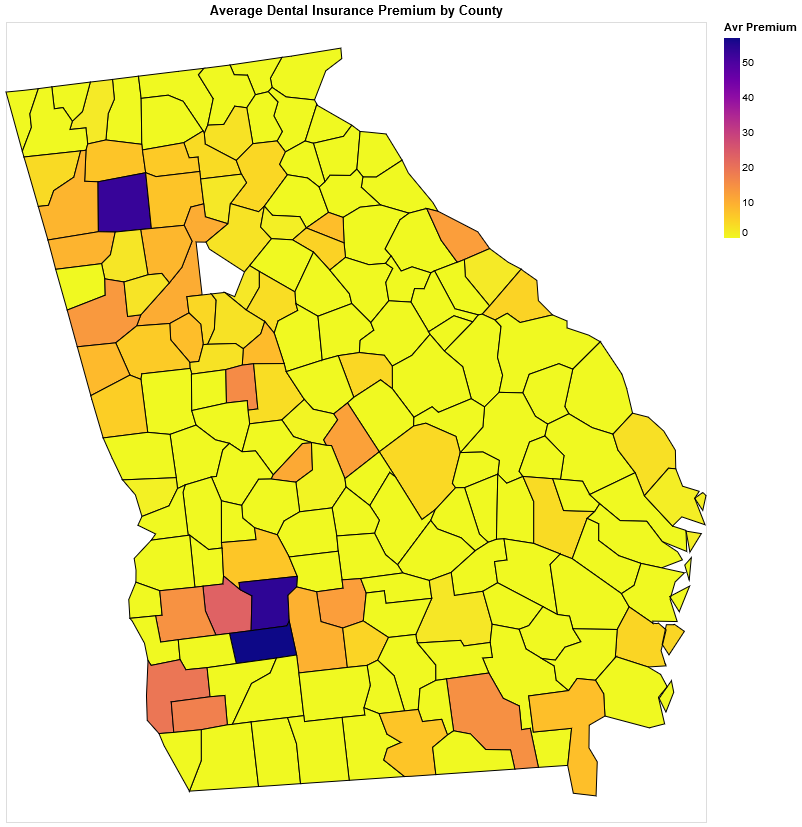

In [144]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, 'states')
source = df.copy()

foreground = alt.Chart(counties).mark_geoshape(
    fill='white',
    stroke='black'
    ).encode(
    color=alt.Color('CasesPer100K:Q', sort="descending",  scale=alt.Scale(scheme='plasma'), legend=alt.Legend(title="Avr Premium", tickCount=6))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['CasesPer100K'])
).project(
    type='albersUsa'
).properties(
    title="Average Dental Insurance Premium by County",
    width=700,
    height=800
)

# generate background for states with no data; create boundary lines for states
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='black'
).properties(
    width=700,
    height=600
).project('albersUsa')

# config = alt.layer(background, foreground).configure_title(fontSize=20, anchor="middle").configure_legend(titleColor='black', titleFontSize=14) 

# config

# background

foreground

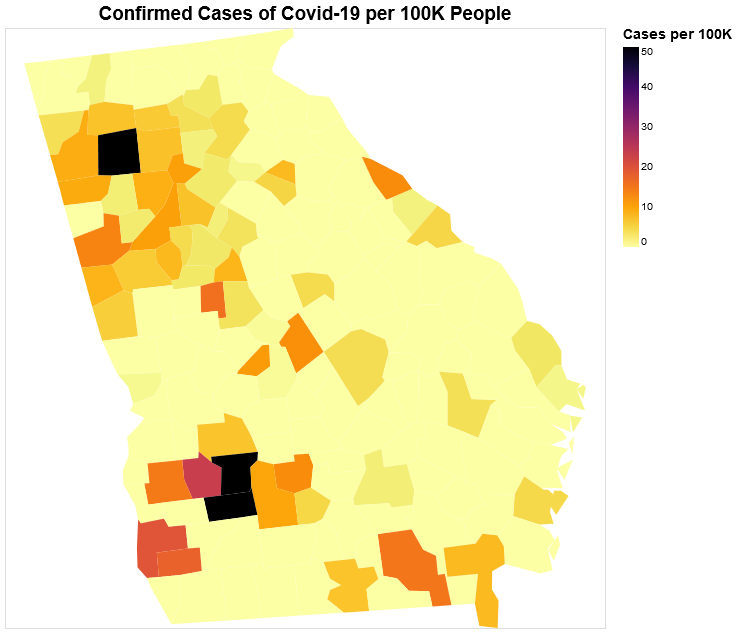

In [26]:
min_value = 0
max_value = 50


counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, 'states')
source = df.copy()

width = 600
height = 600
font_size = 30 / (960 / width)

foreground = alt.Chart(counties).mark_geoshape(
    ).encode(
    color=alt.Color('CasesPer100K:Q', sort="descending", scale=alt.Scale(
        scheme='inferno', domain=(min_value,max_value)
    ), legend=alt.Legend(title="Cases per 100K", tickCount=6)), 
    tooltip=[
        alt.Tooltip('County:O', title="County"), 
        alt.Tooltip('Cases:Q', title="Cases"), 
        alt.Tooltip('CasesPer100K:Q', title="CasesPer100K"), 
        alt.Tooltip('Population:Q', title="Population")
    ]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['CasesPer100K', 'County', 'Cases', 'Population'])
).project(
    type='albersUsa'
).properties(
    title="Confirmed Cases of Covid-19 per 100K People",
    width=width,
    height=height
).configure_title(fontSize=font_size, anchor="middle").configure_legend(titleColor='black', titleFontSize=14) 

# # generate background for states with no data; create boundary lines for states
# background = alt.Chart(states).mark_geoshape(
#     fill='lightgray',
#     stroke='black'
# ).properties(
#     width=width,
#     height=height
# ).project('albersUsa')

# config = alt.layer(background, foreground).configure_title(fontSize=font_size, anchor="middle").configure_legend(titleColor='black', titleFontSize=14) 

foreground

In [29]:
foreground.save('ga_covid.html')